In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
class Value:
    
    def __init__(self, data, _children=(), _op="", label=""): 
        
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), "-")
    

    #def backward()

#L.backward()

In [27]:
def get_nodes_edges(output):
    
    nodes, edges = set(), set()

    def add_nodes_edges(node):
        
        if node not in nodes:
            nodes.add(node)
            for val in node._prev:
                edges.add((val, node))
                add_nodes_edges(val)
    
    add_nodes_edges(output)
    
    return nodes, edges

def draw_dot(output, mode = 'svg', rank = 'LR'):
    
    """
    mode: png | svg | ...
    rank: TB (top to bottom graph) | LR (left to right)
    """
    
    assert rank in ['LR', 'TB']
    nodes, edges = get_nodes_edges(output)
    dot = Digraph(format = mode, graph_attr={'rankdir': rank}) 
    
    for node in nodes:
        dot.node(name=str(id(node)), label = f"{node.label} | data: {node.data:.3f} | grad: {node.grad:.3f}", shape='record')
        if node._op:
            dot.node(name=str(id(node)) + node._op, label = node._op)
            dot.edge(str(id(node)) + node._op, str(id(node)))
    
    for val, node in edges:
        dot.edge(str(id(val)), str(id(node)) + node._op)
    
    return dot

In [ ]:
a) Get the derivates of the following functions:

1. 3x^2 - 10x + 3                               -->  1. 6x - 10
2. 4x^3 + x^2 - 23x + 50                        -->  2. 12x^2 + 2x - 23  
3. x^4- 15x^3 + 20x^2 - 193x + 23               -->  3. 4x^3- 45x^2 + 40x - 193
4. 10x^5 - 21x^4- x^3 + 3x^2 - 45x + 3          -->  4. 50x^4 - 84x^3- 3x^2 + 6x - 45
5. 3x^6 + 13x^5 - x^4- 3x^3 + 12x^2 - 33x       -->  5. 18x^5 + 65x^4 - 4x^3- 9x^2 + 24x - 33

In [ ]:
b) Plot and compute the gradients of the following computations:

1. a = 3, b = -1, c = 4; e = a + b; d = e - c
2. a = -2, b = 3, c = -4, d = -3; e = a - b; f = c + e; g = f - d
3. a = -1, b = 4, c = -1, d = -2; e = a * b; f = c - e; g = f + d
4. a = 3, b = 0, c = -2, d = 4; e = a - b; f = c * e;   g = f - d
5. a = 5, b = 1, c = 3, d = 0; e = a * b; f = c * e;   g = f - d

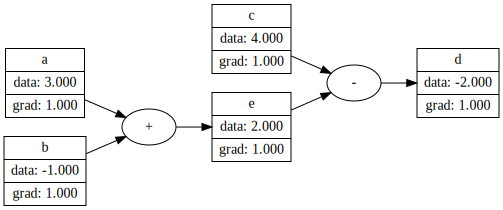

In [28]:
# 1. a = 3, b = -1, c = 4; e = a + b; d = e - c

a = Value(3., label = 'a'); a.grad = 1 * e.grad
b = Value(-1., label = 'b'); b.grad = 1 * e.grad
c = Value(4., label = 'c'); c.grad = 1 * d.grad
e = a + b; e.label = 'e'; e.grad = 1 * d.grad
d = e - c; d.label = 'd'; d.grad = 1
#L = d; L.label = 'L'; L.grad
draw_dot(d)

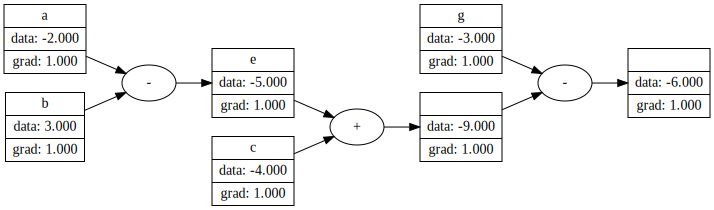

In [29]:
# 2. a = -2, b = 3, c = -4, d = -3; e = a - b; f = c + e; g = f - d

a = Value(-2., label = 'a'); a.grad = 1 * e.grad
b = Value(3., label = 'b'); b.grad = 1 * e.grad
c = Value(-4., label = 'c'); c.grad = 1 * f.grad
d = Value(-3., label = 'd'); d.grad = 1 * g.grad
e = a - b; e.label = 'e'; e.grad = 1 * f.grad
f = e + c; d.label = 'f'; f.grad = 1 * g.grad
g = f - d; d.label = 'g'; g.grad =1
#L = g; L.label = 'L'; L.grad
draw_dot(g)

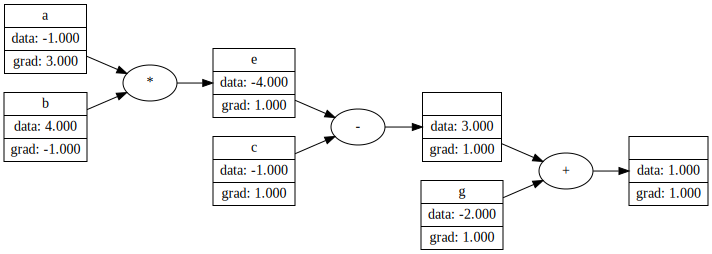

In [30]:
# 3. a = -1, b = 4, c = -1, d = -2; e = a * b; f = c - e; g = f + d

a = Value(-1., label = 'a'); a.grad = b.data * e.grad
b = Value(4., label = 'b'); b.grad = a.data * e.grad
c = Value(-1., label = 'c'); c.grad = 1 * f.grad
d = Value(-2., label = 'd'); d.grad = 1 * g.grad
e = a * b; e.label = 'e'; e.grad = 1 * f.grad
f = c - e; d.label = 'f'; f.grad = 1 * g.grad
g = f + d; d.label = 'g'; g.grad =1
#L = g; L.label = 'L'; L.grad
draw_dot(g)

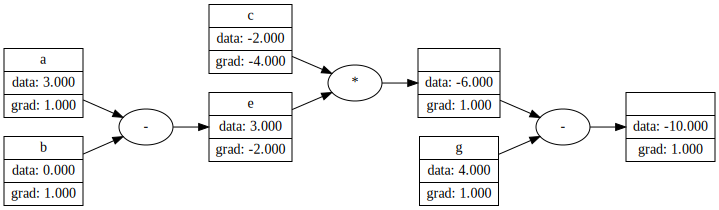

In [31]:
# 4. a = 3, b = 0, c = -2, d = 4; e = a - b; f = c * e;   g = f - d

a = Value(3., label = 'a'); a.grad = 1 * e.grad
b = Value(0., label = 'b'); b.grad = 1 * e.grad
c = Value(-2., label = 'c'); c.grad = e.data * f.grad
d = Value(4., label = 'd'); d.grad = 1 * g.grad
e = a - b; e.label = 'e'; e.grad = c.data * f.grad
f = e * c; d.label = 'f'; f.grad = 1 * g.grad
g = f - d; d.label = 'g'; g.grad =1
#L = g; L.label = 'L'; L.grad
draw_dot(g)

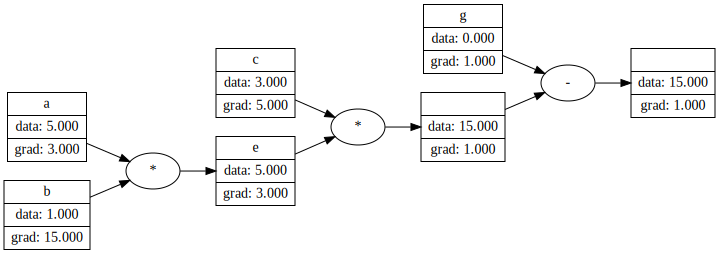

In [14]:
# 5. a = 5, b = 1, c = 3, d = 0; e = a * b; f = c * e;   g = f - d

a = Value(5., label = 'a'); a.grad = b.data * e.grad
b = Value(1., label = 'b'); b.grad = a.data * e.grad
c = Value(3., label = 'c'); c.grad = e.data * f.grad
d = Value(0., label = 'd'); d.grad = 1 * g.grad
e = a * b; e.label = 'e'; e.grad = c.data * f.grad  
f = e * c; d.label = 'f'; f.grad = 1 * g.grad
g = f - d; d.label = 'g'; g.grad =1
#L = g; L.label = 'L'; L.grad
draw_dot(g)